# Performing EDA on Pneumonia Detection dataset 

In [1]:
# Importing necessary libraries to get started

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

### Reading the dataset created to perform EDA 
### Training dataset - final_train_class_df.csv
### Test dataset - final_test_class_df.csv

In [65]:
train_df = pd.read_csv('final_train_class_df.csv')
test_df = pd.read_excel('final_test_class_df.xlsx')

In [66]:
train_df.head()

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,CHEST,PA,WSD,1024,1024,0.143
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,48,F,CHEST,PA,WSD,1024,1024,0.194
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,19,M,CHEST,AP,WSD,1024,1024,0.168
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,CR,28,M,CHEST,PA,WSD,1024,1024,0.143
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139


In [41]:
test_df.head()

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100
1,0005d3cc-3c3f-40b9-93c3-46231c3eb813,0.5 0 0 100 100
2,000686d7-f4fc-448d-97a0-44fa9c5d3aa6,0.5 0 0 100 100
3,000e3a7d-c0ca-4349-bb26-5af2d8993c3d,0.5 0 0 100 100
4,00100a24-854d-423d-a092-edcf6179e061,0.5 0 0 100 100


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37629 entries, 0 to 37628
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientId         37629 non-null  object 
 1   x                 16957 non-null  float64
 2   y                 16957 non-null  float64
 3   width             16957 non-null  float64
 4   height            16957 non-null  float64
 5   Target            37629 non-null  int64  
 6   class             37629 non-null  object 
 7   Modality          37629 non-null  object 
 8   PatientAge        37629 non-null  int64  
 9   PatientSex        37629 non-null  object 
 10  BodyPartExamined  37629 non-null  object 
 11  ViewPosition      37629 non-null  object 
 12  ConversionType    37629 non-null  object 
 13  Rows              37629 non-null  int64  
 14  Columns           37629 non-null  int64  
 15  PixelSpacing      37629 non-null  float64
dtypes: float64(5), int64(4), object(7)
memor

In [67]:
train_df['Target'].value_counts()

0    20672
1    16957
Name: Target, dtype: int64

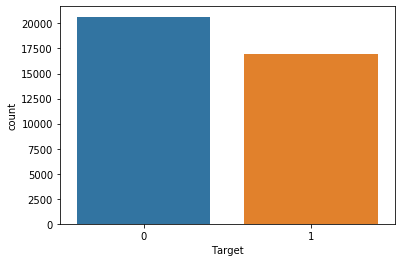

In [68]:
sns.countplot(train_df['Target'])

In [69]:
# Getting all records with Target = 1 - having Lung Opacity
train_df_target1 = train_df[train_df.Target == 1]

In [70]:
train_df_target1.shape

(16957, 16)

In [71]:
train_df['class'].value_counts()

Lung Opacity                    16957
No Lung Opacity / Not Normal    11821
Normal                           8851
Name: class, dtype: int64

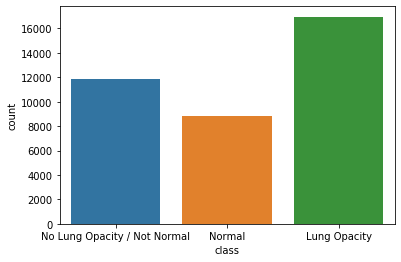

In [9]:
sns.countplot(train_df['class'])

In [10]:
train_df['PatientSex'].value_counts()

M    21498
F    16131
Name: PatientSex, dtype: int64

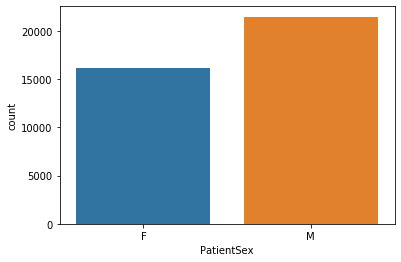

In [11]:
sns.countplot(train_df['PatientSex'])

In [12]:
train_df['PatientAge'].value_counts()

58     1291
56     1123
52      997
55      903
40      894
       ... 
151       1
150       1
155       1
148       1
153       1
Name: PatientAge, Length: 97, dtype: int64

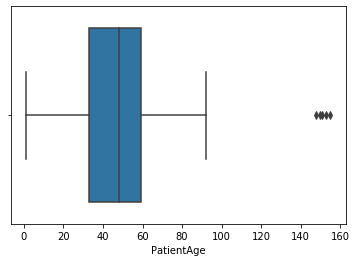

In [13]:
sns.boxplot(x=train_df['PatientAge'], data=train_df)

#### We observe several records having age 150 - which needs to be validated either to drop or fix it with an assumption of median values

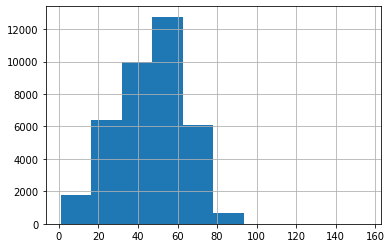

In [14]:
train_df['PatientAge'].hist()

In [15]:
train_df['is_duplicate'] = train_df.duplicated(subset=None, keep='first')
train_df['is_duplicate'].value_counts()

False    30227
True      7402
Name: is_duplicate, dtype: int64

## EDA Inferences

### EDA performed on the data taken out from each of parameters extracted from the images and clubbed against their patient ID's to validate them for its accuracy, impact based on availability of information overall. Below are some of the key findings.

#### 1) There are totally 37,629 records available in the dataset where in 16 fields were extracted for validation
#### 2) For Pnuemonia detection - "Target" Field provides the classification. 0 : No Lung Opacity, 1 : Lung Opacity 
#### 3) "class" Field provides 3 groups. However when its seen against Target classification and respective coordinates availability - its doesn't seems to isolate between Normal and Not Normal cases. There are may be other problems, for the purpose of this exercise this observation will be ignored
#### 4) "Target" has 20,672 records/images which are Not having Lung Opacity and 16,957 having lung Opacity. We observe 55% of the images doesn't have lung opacity and only 45% having Lung Opacity - This may create imbalance in prediction tending towards not having Lung Opacity - Need to observe this furhter for duplicate records and plan for data augmentation 
#### 5) "PatientAge" - We observe 5 records having ages above 100 - which should be dropped 
#### 6) "PatientSex" - We observe 55% of male records in the total count. This may not be a factor for recognition hence decided to continue even though there is imbalance.. 
#### 7) We observe 9555 records are unique - which needs to be considered for model building 


In [16]:
train_df.head()

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,is_duplicate
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,CHEST,PA,WSD,1024,1024,0.143,False
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,48,F,CHEST,PA,WSD,1024,1024,0.194,False
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,19,M,CHEST,AP,WSD,1024,1024,0.168,False
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,CR,28,M,CHEST,PA,WSD,1024,1024,0.143,False
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139,False


In [17]:
train_df['is_duplicate'].value_counts()

False    30227
True      7402
Name: is_duplicate, dtype: int64

In [78]:
## Dropping the duplicate rows
# train_df.drop_duplicates( keep=False, inplace = True)

train_df.drop_duplicates(subset=['patientId', 'x', 'y', 'width', 'height' ], keep='first', inplace=True)

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientId         30227 non-null  object 
 1   x                 9555 non-null   float64
 2   y                 9555 non-null   float64
 3   width             9555 non-null   float64
 4   height            9555 non-null   float64
 5   Target            30227 non-null  int64  
 6   class             30227 non-null  object 
 7   Modality          30227 non-null  object 
 8   PatientAge        30227 non-null  int64  
 9   PatientSex        30227 non-null  object 
 10  BodyPartExamined  30227 non-null  object 
 11  ViewPosition      30227 non-null  object 
 12  ConversionType    30227 non-null  object 
 13  Rows              30227 non-null  int64  
 14  Columns           30227 non-null  int64  
 15  PixelSpacing      30227 non-null  float64
dtypes: float64(5), int64(4), object(7)
memor

In [87]:
# Compare target column with sex column
pd.crosstab(train_df_target1.Target, train_df.PatientSex)

PatientSex,F,M
Target,,
1,3995,5560


In [53]:
pd.crosstab(train_df_target1.Target, train_df_target1.PatientAge)

PatientAge,1,2,3,4,5,6,7,8,9,10,...,83,84,85,86,87,88,89,90,91,92
Target,,,,,,,,,,,,,,,,,,,,,
1,4,14,21,2,12,79,23,24,139,65,...,1,11,4,21,19,12,4,23,4,1


In [38]:
bins = [-1, 10,20,30,40,50,60,70,80,90,100, np.inf]
labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80', '81-90','91-100','more than 100']
# df=df.groupby(pd.cut(df['value'], bins=bins, labels=labels)).size().reset_index(name='count')
df=train_df.groupby(pd.cut(train_df['PatientAge'], bins=bins, labels=labels)).size().reset_index(name='count')
print (df)

       PatientAge  count
0            0-10    357
1           11-20   1255
2           21-30   2725
3           31-40   3338
4           41-50   4450
5           51-60   5829
6           61-70   3851
7           71-80   1279
8           81-90    194
9          91-100      3
10  more than 100      5


In [76]:
bins = [-1, 10,20,30,40,50,60,70,80,90,100, np.inf]
labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80', '81-90','91-100','more than 100']
# df=df.groupby(pd.cut(df['value'], bins=bins, labels=labels)).size().reset_index(name='count')
df_target1=train_df_target1.groupby(pd.cut(train_df_target1['PatientAge'], bins=bins, labels=labels)).size().reset_index(name='count')
print (df_target1)

       PatientAge  count
0            0-10    219
1           11-20    602
2           21-30   1308
3           31-40   1591
4           41-50   1675
5           51-60   2226
6           61-70   1313
7           71-80    518
8           81-90    100
9          91-100      3
10  more than 100      0


In [77]:
train_df_target1.shape

(9555, 16)

In [60]:
train_df_target1.head()

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
5,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
7,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,CR,75,M,CHEST,PA,WSD,1024,1024,0.143


In [61]:
train_df_target1['Target'].value_counts()

1    16957
Name: Target, dtype: int64

In [74]:
train_df_target1.drop_duplicates(subset=['patientId', 'x', 'y', 'width', 'height' ], keep='first' , inplace=True)

D:\Users\Servion\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
train_df_target1['Target'].value_counts()

1    9555
Name: Target, dtype: int64

### Based on the above by removing duplicates - we will have to consider 9555 records as unique ones for processing and accordingly respective images..

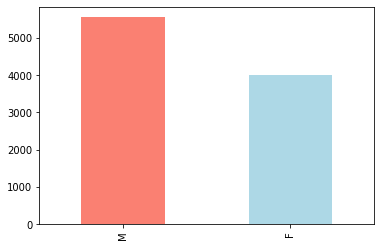

In [81]:
# The disrtibution of the data based on Patient Sex field
train_df_target1['PatientSex'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

### With the above we observe the dataset has more male records than female and we may see an imbalance basis this..

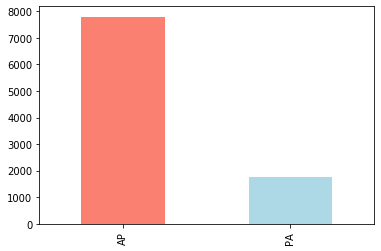

In [82]:
train_df_target1['ViewPosition'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

### With respect to Column "ViewPosition" corellated with the Target value of 1 - There is high imbalance that we observe with the above information having AP (Anterior-Posterior). One way to interpret this target unbalance is that patients that are imaged in an AP position are those that are more ill, and therefore more likely to have contracted pneumonia. Note that the absolute split between AP and PA images is about 50-50, so the above consideration is extremely significant.

<Figure size 432x288 with 0 Axes>

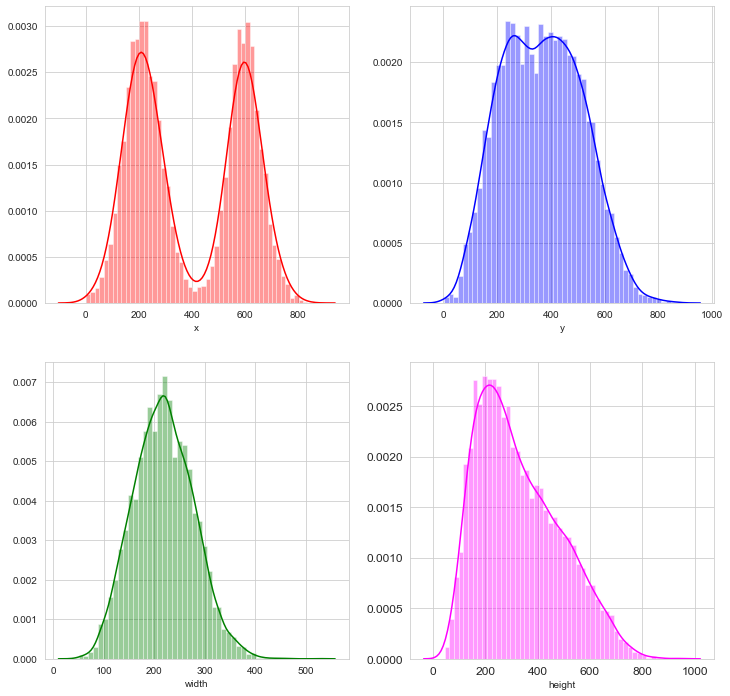

In [83]:
# Checking the distribution of X, Y, Width and hieght 
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(train_df_target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(train_df_target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(train_df_target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(train_df_target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

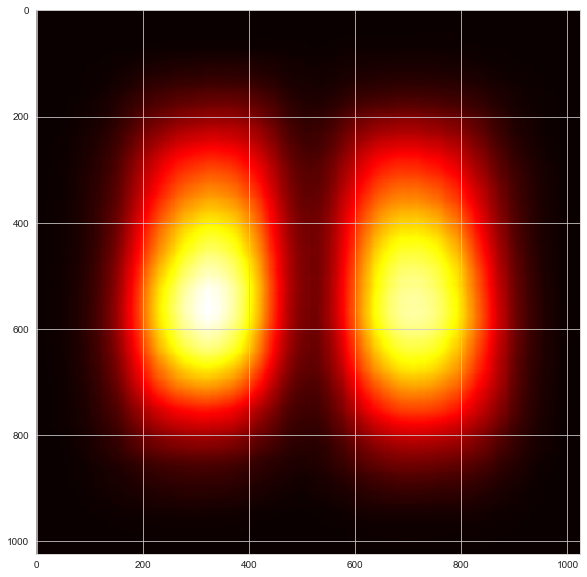

In [86]:
#Show the boxes as segmentation
# By showing them as segmentations we can get a better probability map for where the opacity regions are most likely to occur
X_STEPS, Y_STEPS = 1024, 1024
xx, yy = np.meshgrid(np.linspace(0, 1024, X_STEPS),
           np.linspace(0, 1024, Y_STEPS), 
           indexing='xy')
prob_image = np.zeros_like(xx)
for _, c_row in train_df_target1.sample(5000).iterrows():
    c_mask = (xx>=c_row['x']) & (xx<=(c_row['x']+c_row['width']))
    c_mask &= (yy>=c_row['y']) & (yy<=c_row['y']+c_row['height'])
    prob_image += c_mask
fig, ax1 = plt.subplots(1, 1, figsize = (10, 10))
ax1.imshow(prob_image, cmap='hot')